ML LAB 1 Exp
22102B2001
Chinmay Rajan Mhatre

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.metrics import accuracy_score
import plotly.express as px

In [105]:
df = pd.read_csv("/content/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [106]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [107]:
val = df['total_bedrooms'].median()
val

435.0

In [108]:
df['total_bedrooms'].dropna()

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20433, dtype: float64

In [109]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [111]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [112]:
df['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2,  'NEAR OCEAN': 3, 'ISLAND': 4})
df['ocean_proximity']

0        0
1        0
2        0
3        0
4        0
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: ocean_proximity, Length: 20640, dtype: int64

**EDA**

In [113]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [114]:
fig = px.histogram(df, x="median_house_value")
fig.show()

In [115]:
corr = df.corr(method = 'pearson')['median_house_value']
corr

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
ocean_proximity      -0.210600
Name: median_house_value, dtype: float64

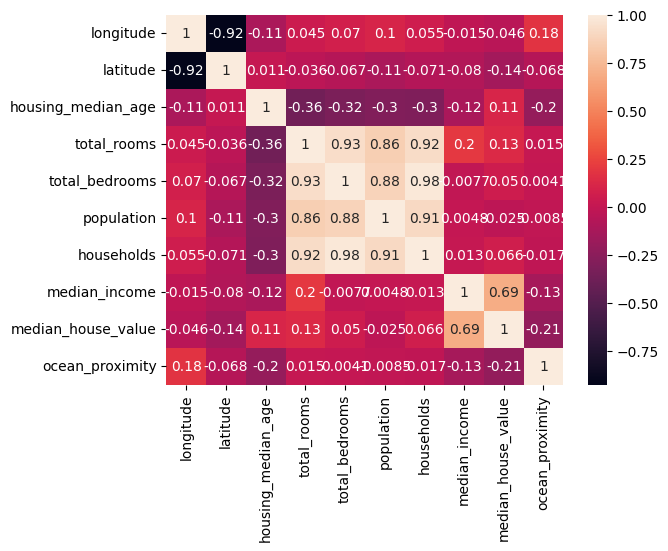

In [116]:
heatmap = sns.heatmap(df.corr(),annot=True)

In [117]:
data = df.head(5000)
x = data['median_income']
y = data['median_house_value']
px.scatter(data,x,y)

In [118]:
np.linspace(y.min(), y.max(), 11)

array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
       306000.2, 354500.4, 403000.6, 451500.8, 500001. ])

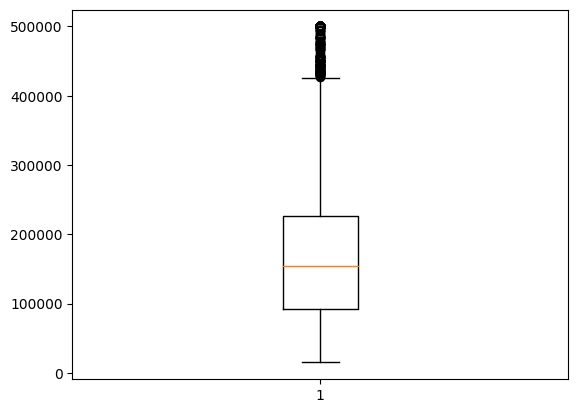

In [119]:
plt.boxplot(data['median_house_value'])
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

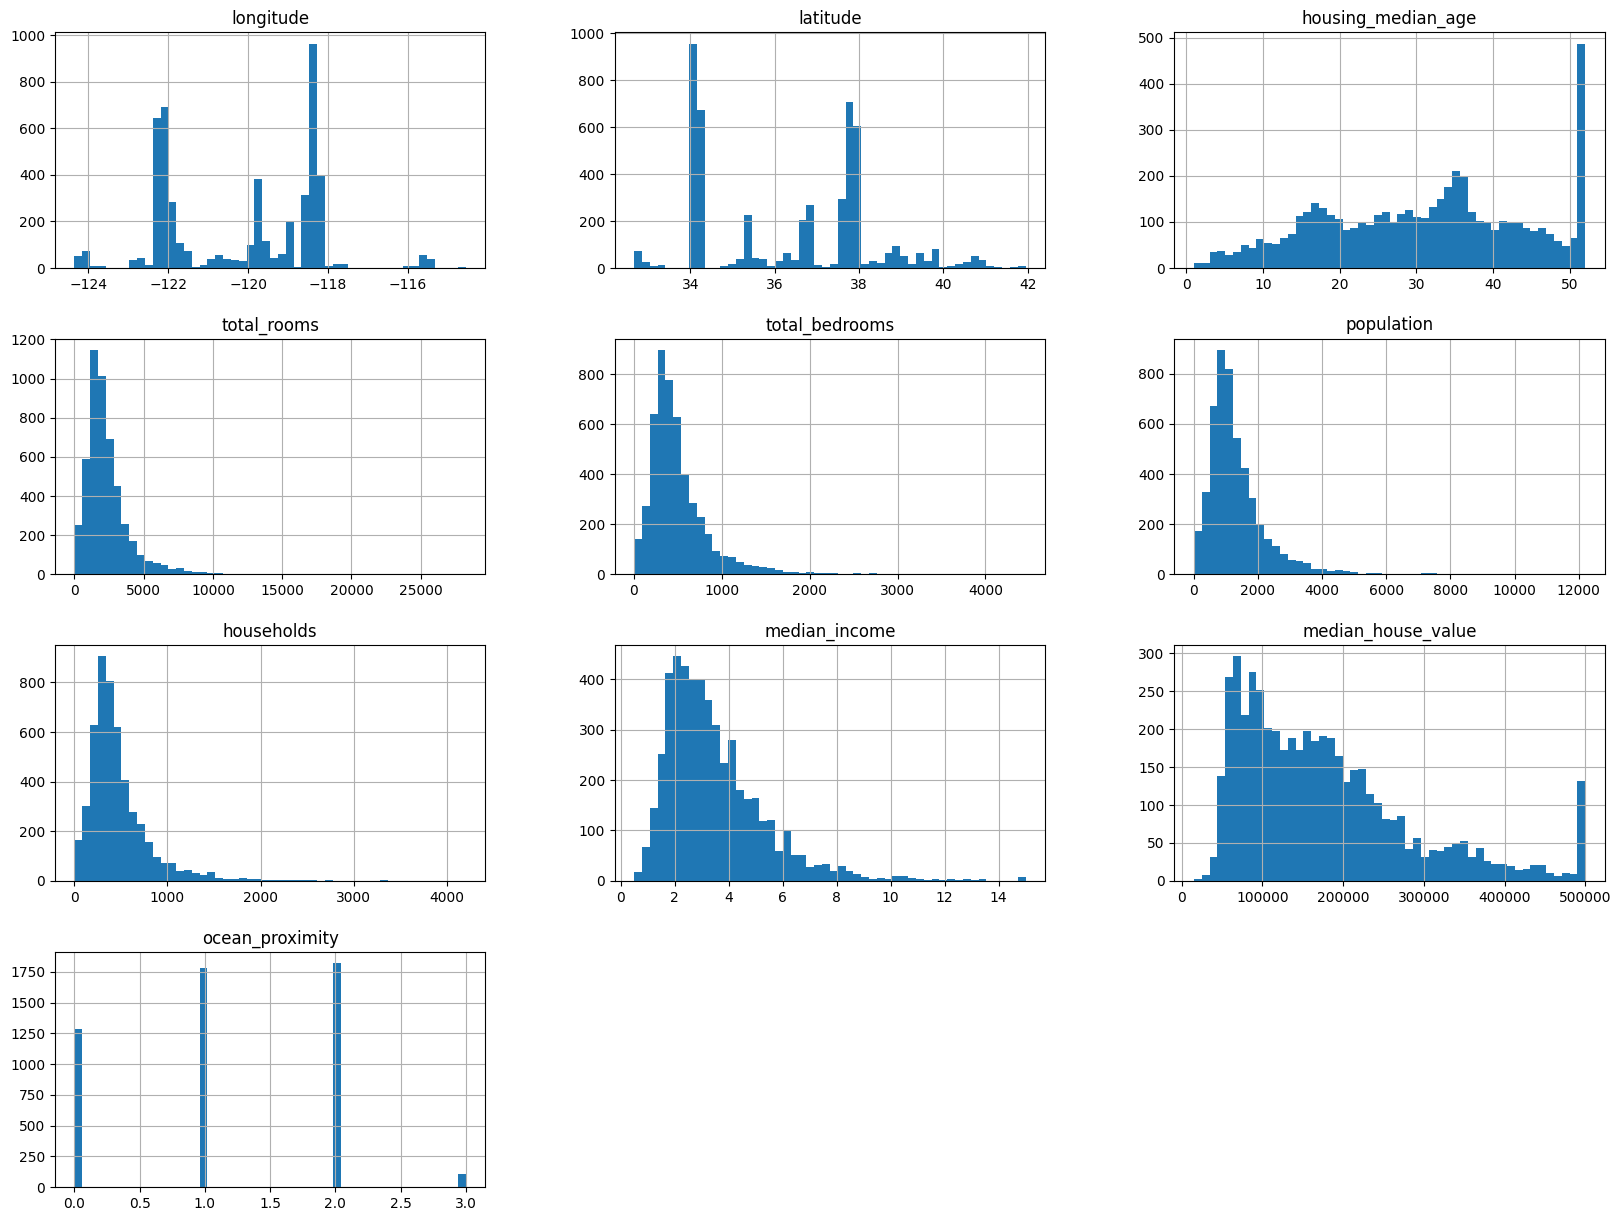

In [120]:
data.hist(bins=50,figsize=(20,15))

In [121]:
(df['median_house_value'] > 420000)

0         True
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: median_house_value, Length: 20640, dtype: bool

In [122]:
(df['median_house_value'] > 420000).sum()

1540

In [123]:
df.columns
housing_Df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']]
housing_Df.head()
housing_Df.dropna(inplace=True)
housing_Df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [124]:
train_pd, test_pd, val_pd = housing_Df[:18000], housing_Df[18000:19217], housing_Df[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [125]:
X_train, y_train = train_pd.drop('median_house_value', axis=1), train_pd.to_numpy()[:,-1]
X_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,0


In [126]:
X_val, y_val = val_pd.to_numpy()[:,:-1], val_pd.to_numpy()[:,-1]
X_test, y_test = test_pd.to_numpy()[:,:-1],test_pd.to_numpy()[:,-1]

In [127]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((18000, 9), (18000,), (1217, 9), (1217,), (1218, 9), (1218,))

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

In [129]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8
0,-1.453822,1.204250,0.935040,-0.795703,-0.964371,-0.970876,-0.972988,2.329362,-1.682789
1,-1.448767,1.194570,-0.642170,2.018961,1.315597,0.843015,1.637958,2.316883,-1.682789
2,-1.458876,1.189729,1.802506,-0.530032,-0.822019,-0.819064,-0.841409,1.769472,-1.682789
3,-1.463931,1.189729,1.802506,-0.617382,-0.717005,-0.764970,-0.733049,0.923030,-1.682789
4,-1.463931,1.189729,1.802506,-0.457617,-0.611991,-0.758863,-0.629850,-0.019156,-1.682789
...,...,...,...,...,...,...,...,...,...
17995,-1.352724,0.947718,-0.799891,0.530841,1.597968,0.432076,1.676658,-0.192608,-0.513103
17996,-1.352724,0.957398,-1.036472,0.345732,1.518624,0.038586,1.392859,-0.155537,-0.513103
17997,-1.347669,0.952558,-0.642170,-0.075631,0.314465,0.044694,0.479544,0.011046,-0.513103
17998,-1.347669,0.952558,-0.326728,-0.255309,-0.362291,-0.141145,-0.309932,0.460457,-0.513103


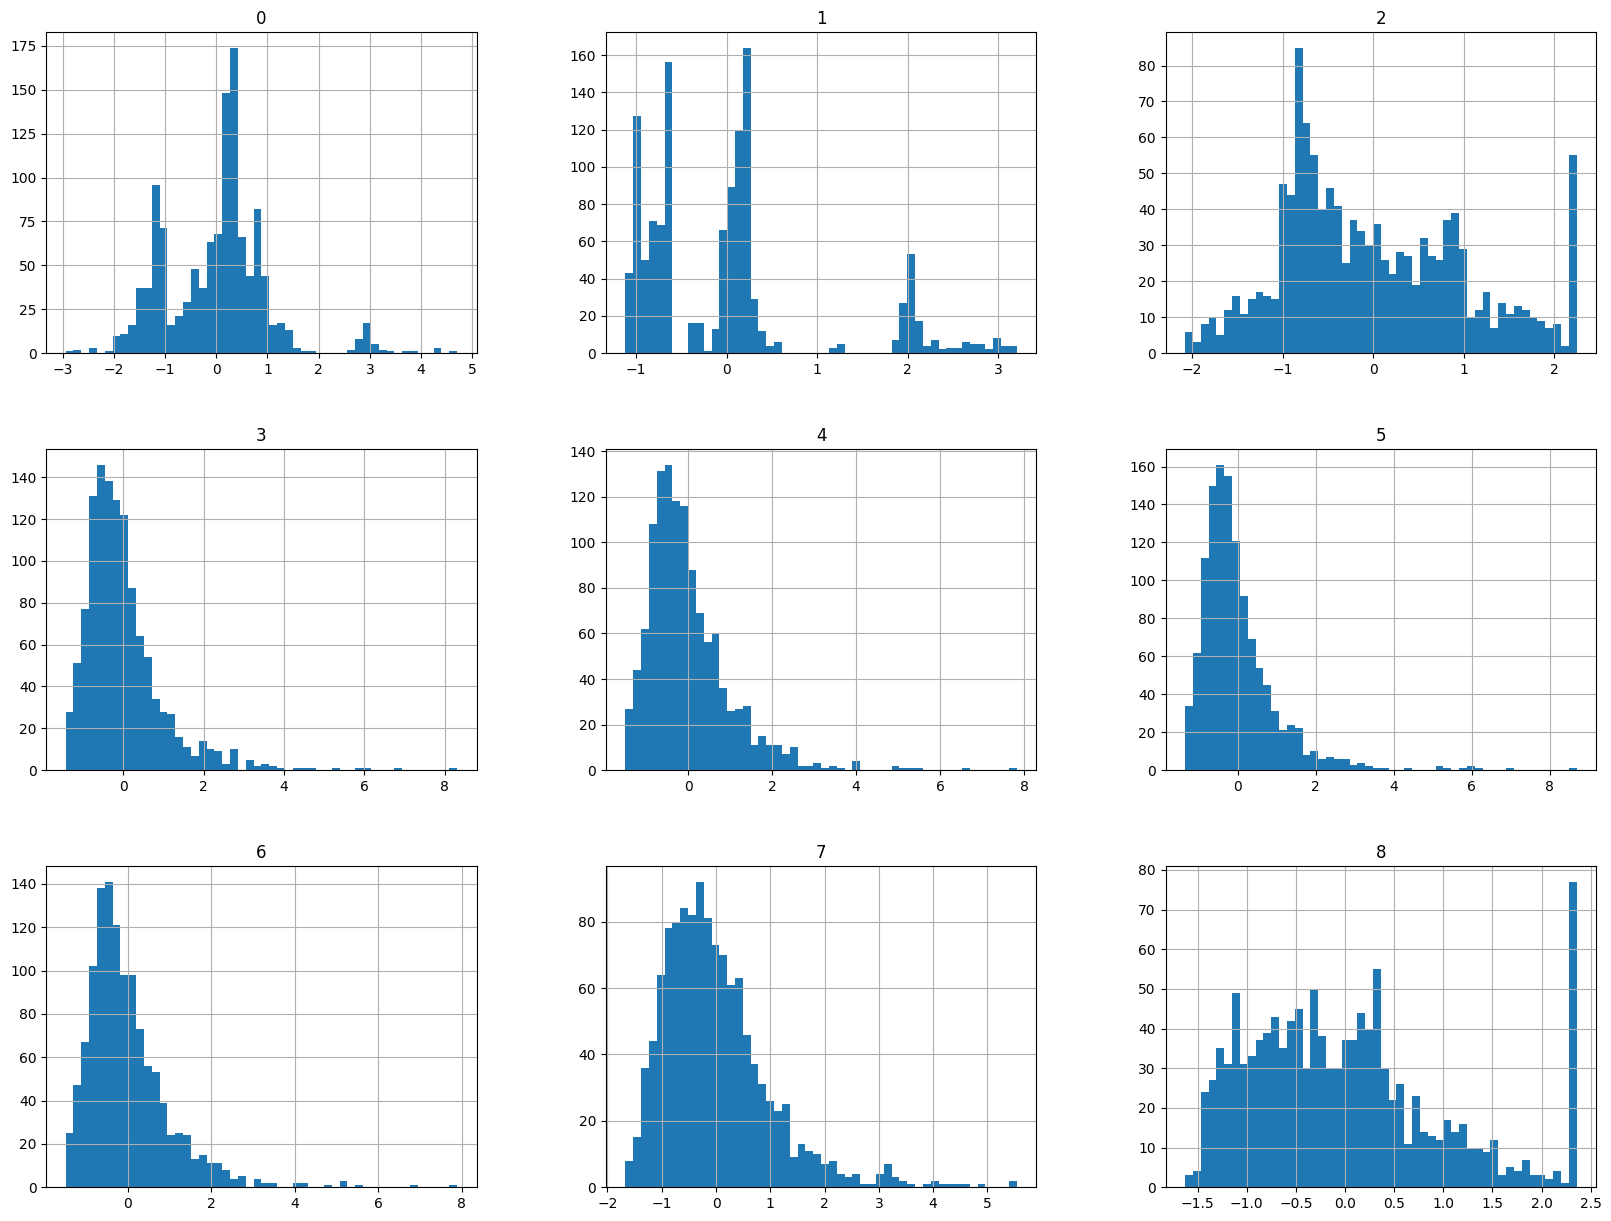

In [130]:
pd.DataFrame(X_test).hist(bins=50, figsize=(20,15))
plt.show()

In [131]:
X_train.shape, X_test.shape, X_val.shape

((18000, 9), (1217, 9), (1218, 9))

Linear Regression

In [133]:
#  Preprocessing - scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
# Train the model
lm = LinearRegression().fit(X_train_scaled, y_train)


In [134]:

y_train_pred = lm.predict(X_train_scaled)
y_val_pred = lm.predict(X_val_scaled)


In [135]:
mse_train = mse(y_train, y_train_pred)
rmse_train = mse(y_train, y_train_pred, squared=False)
# Calculate MSE and RMSE for validation set
mse_val = mse(y_val, y_val_pred)
rmse_val = mse(y_val, y_val_pred, squared=False)
# Calculate R² score for training set
r2_train = r2_score(y_train, y_train_pred)
# Calculate R² score for validation set
r2_val = r2_score(y_val, y_val_pred)

In [136]:
print(f'Training MSE: {mse_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training R²: {r2_train}')

Training MSE: 3.543895986947175e-31
Training RMSE: 5.953063066142652e-16
Training R²: 1.0


In [137]:
print(f'Validation MSE: {mse_val}')
print(f'Validation RMSE: {rmse_val}')
print(f'Validation R²: {r2_val}')

Validation MSE: 1.4624634571995185
Validation RMSE: 1.2093235535618738
Validation R²: -3.725684670880182


In [139]:
print('Some predictions on the validation set:', y_val_pred[:5])


Some predictions on the validation set: [2.50073119 1.5260041  1.6479579  1.66873522 1.61001672]


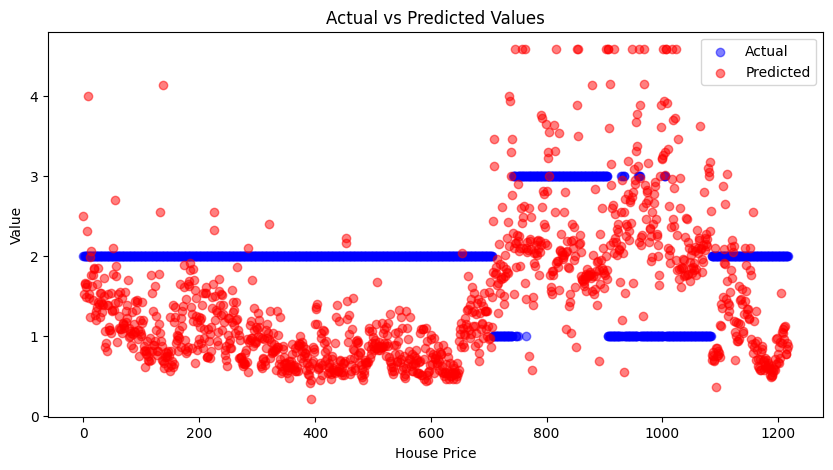

In [140]:
plt.figure(figsize=(10, 5))
# Plot actual values
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.5, label='Actual')
# Plot predicted values
plt.scatter(range(len(y_val)), y_val_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('House Price')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
